# Analysis of Covid-19 data from the LA Times

https://github.com/datadesk/california-coronavirus-data

"These files come from a continual Times survey of California's 58 county health agencies and three city agencies. Updated numbers are published throughout the day at latimes.com/coronavirustracker. This repository will periodically update with an extract of that data."

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:1650px !important; }</style>"))
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.ticker import StrMethodFormatter, NullFormatter, FuncFormatter
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None
date_format = mdates.DateFormatter('%Y-%m-%d')

## Load data from CSV files

In [17]:
data = pd.read_csv('latimes-place-totals.csv', index_col='date', parse_dates=True)
lacounty = data[data['county']=='Los Angeles']

sgv_cities = ['Arcadia','Monrovia','Duarte','Azusa','Glendora','East Pasadena','Bradbury','Sierra Madre','Industry','Rosemead','Covina','Charter Oak','North El Monte','La Verne','West Covina','San Marino']
sgv = pd.DataFrame()
for city in sgv_cities:
    sgv = sgv.append(lacounty[lacounty['place']=='City of '+city])
sgv['place'] = 'San Gabriel Valley'

sgv = sgv.groupby(sgv.index).sum()
sgv = sgv[['confirmed_cases']] # Drop unused columns
sgv

,confirmed_cases
date,
2020-03-27,26
2020-03-28,29
2020-03-29,38
2020-03-30,43
2020-03-31,48
2020-04-01,57
2020-04-02,60
2020-04-03,68
2020-04-04,81


## Plot Number of Cases 

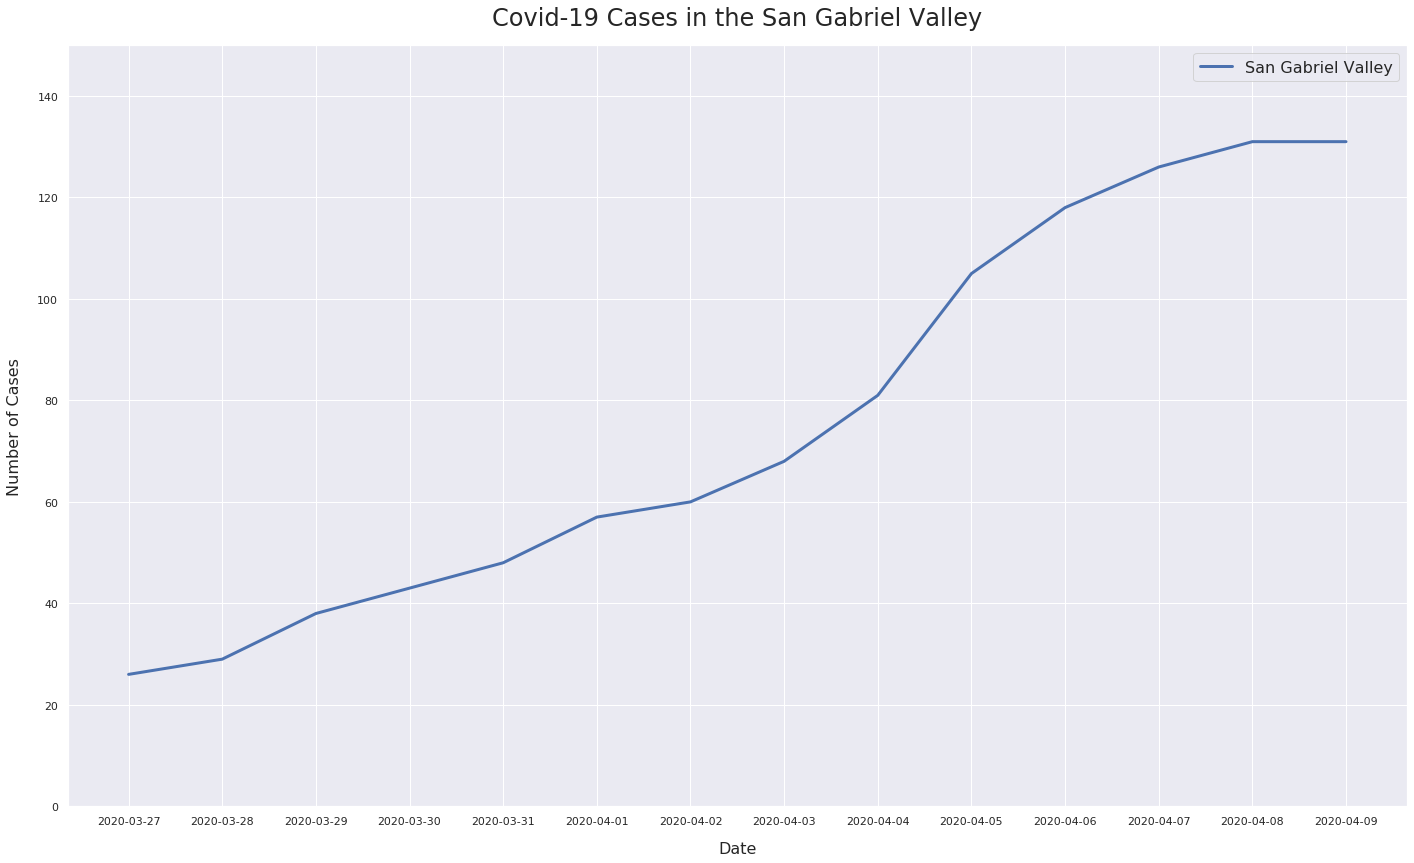

In [18]:

fig, ax = plt.subplots(figsize=(24, 14))
ax.plot(sgv.index, sgv['confirmed_cases'], linewidth=3, label='San Gabriel Valley')

plt.title('Covid-19 Cases in the San Gabriel Valley', fontsize=24, pad=20)
ax.set_ylabel('Number of Cases', fontsize=16, labelpad=15)
ax.set_xlabel('Date', fontsize=16, labelpad=15)
ax.set_ylim(0,150)
ax.set_xticks(sgv.index)
ax.xaxis.set_major_formatter(date_format)

plt.legend(fontsize=16)

# Examine the doubling rate

The slope of the number of cases when plotted on a log scale gives a visual reference for the doubling rate.  If interventions such as "safer at home" are working then the slope of the number of cases will be decreasing with time. If not, the line will appear linear.

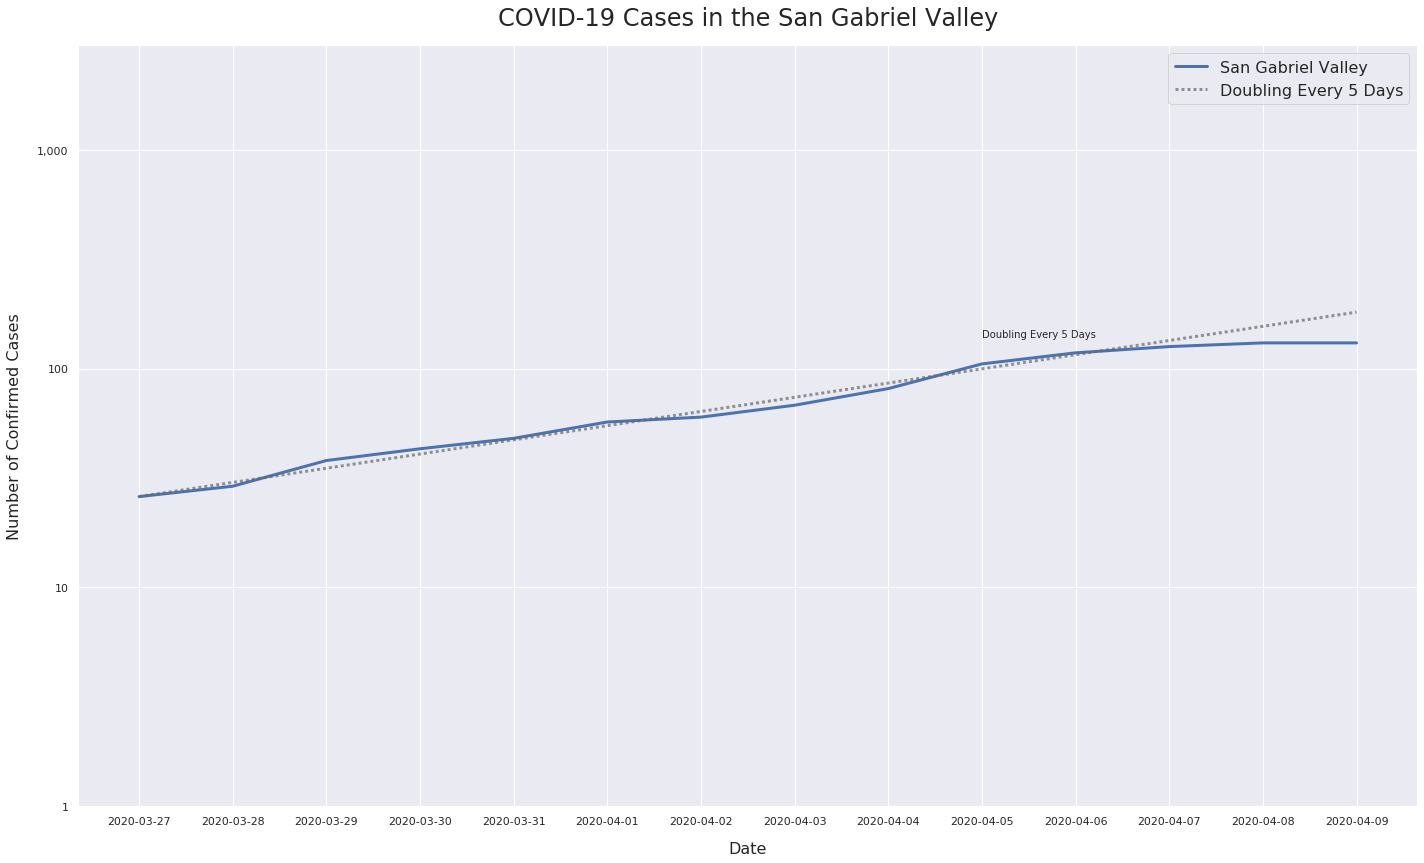

In [19]:


fig, ax = plt.subplots(figsize=(24, 14))

# A list for plotting doubling time reference lines
x_ref = np.linspace(0, len(sgv.index), len(sgv.index))
line_sgv, = ax.plot(sgv.index, sgv['confirmed_cases'], linewidth=3, label='San Gabriel Valley')

initial_cases = sgv['confirmed_cases'][0]
ax.plot(sgv.index, [initial_cases*(2**(1/5*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 5 Days', color='dimgrey', alpha=0.7)
ax.text('2020-04-05', 140, 'Doubling Every 5 Days', fontsize=10)

plt.yscale('log')

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,3000)

ax.set_xlabel('Date', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Confirmed Cases', fontsize=16, labelpad=15)
ax.set_xticks(sgv.index)
ax.xaxis.set_major_formatter(date_format)
plt.title('COVID-19 Cases in the San Gabriel Valley', fontsize=24, pad=20)
plt.legend(fontsize=16)
plt.savefig('covid19-sgv.png',bbox_inches='tight')